In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image: BabyFood-Test2.JPG, Estimated Number of Spoons: 1, Label: Pass


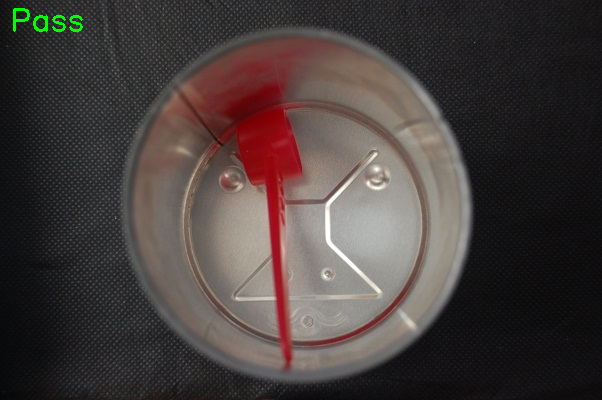

Image: BabyFood-Test10.JPG, Estimated Number of Spoons: 1, Label: Pass


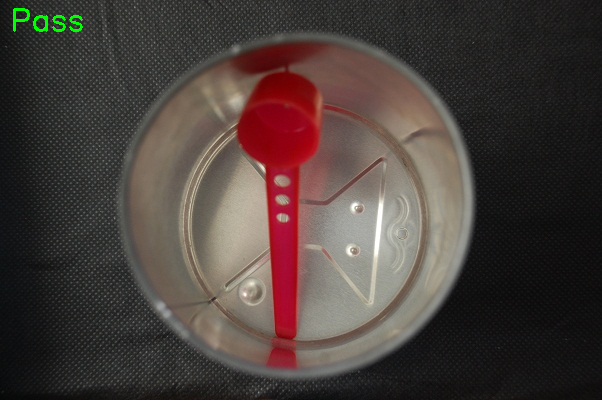

Image: BabyFood-Test17.JPG, Estimated Number of Spoons: 0, Label: Fail


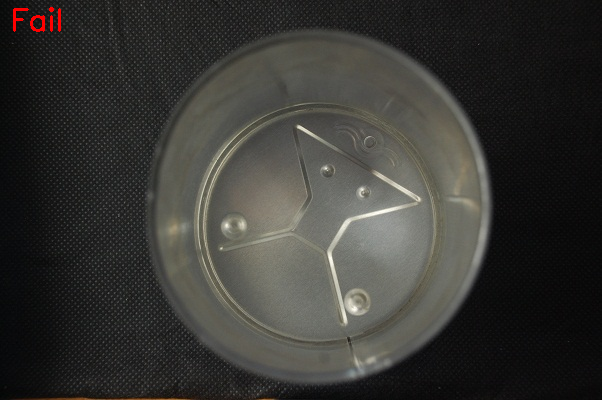

Image: BabyFood-Test13.JPG, Estimated Number of Spoons: 1, Label: Pass


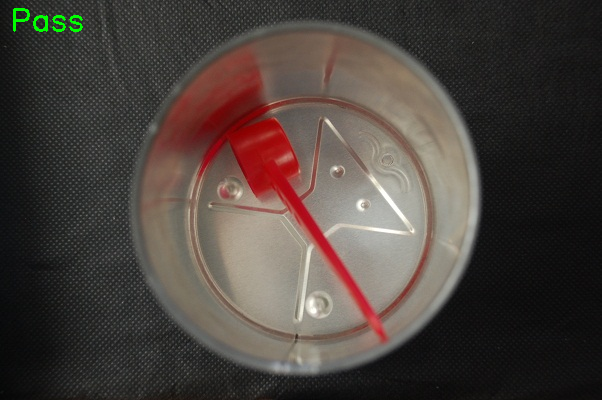

Image: BabyFood-Test14.JPG, Estimated Number of Spoons: 2, Label: Fail


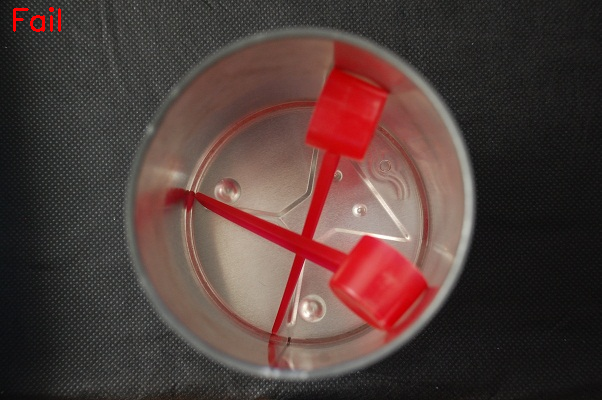

Image: BabyFood-Test6.JPG, Estimated Number of Spoons: 2, Label: Fail


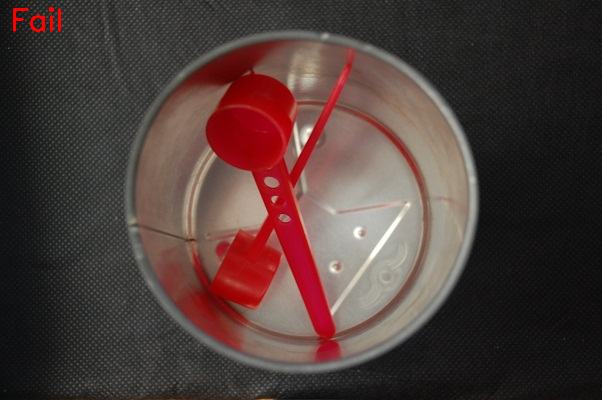

Image: BabyFood-Test18.JPG, Estimated Number of Spoons: 1, Label: Pass


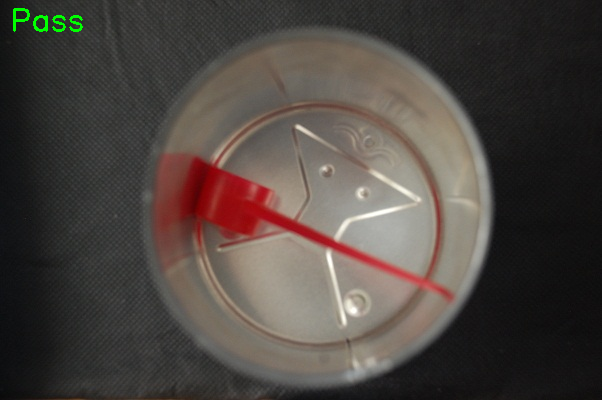

Image: BabyFood-Test16.JPG, Estimated Number of Spoons: 0, Label: Fail


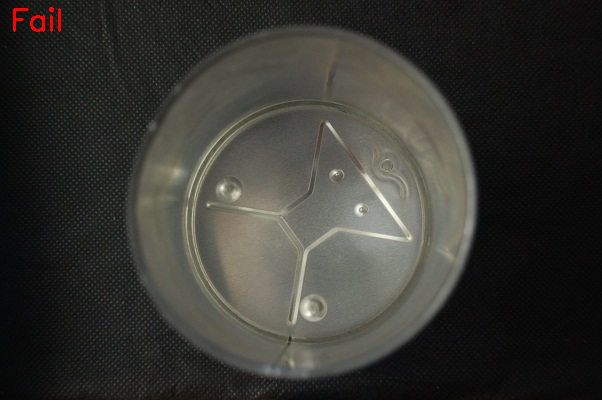

Image: BabyFood-Test3.JPG, Estimated Number of Spoons: 2, Label: Fail


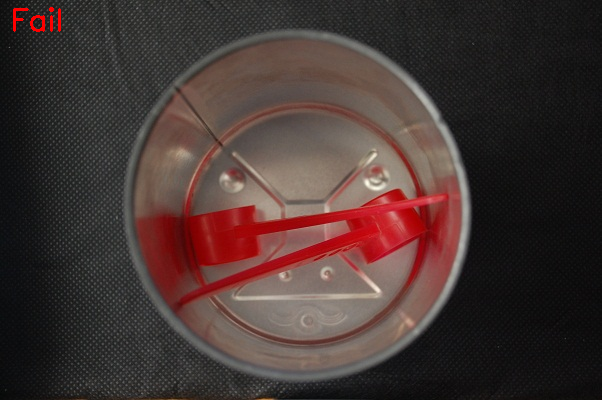

Image: BabyFood-Test12.JPG, Estimated Number of Spoons: 1, Label: Pass


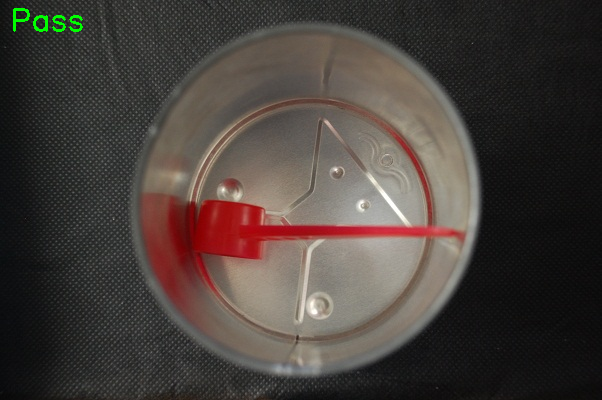

Image: BabyFood-Test4.JPG, Estimated Number of Spoons: 1, Label: Pass


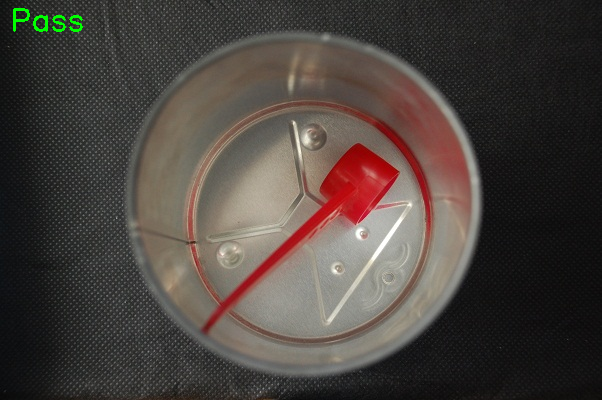

Image: BabyFood-Test5.JPG, Estimated Number of Spoons: 1, Label: Pass


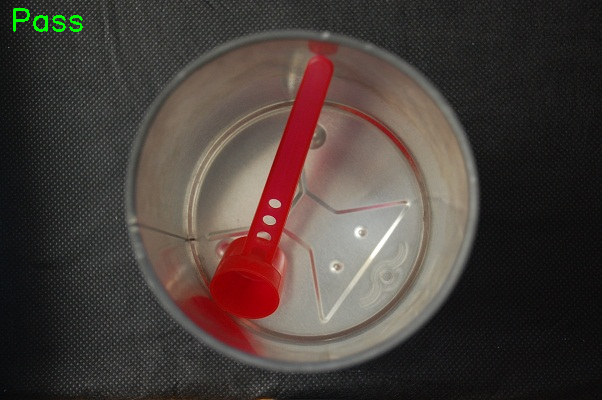

Image: BabyFood-Test8.JPG, Estimated Number of Spoons: 1, Label: Pass


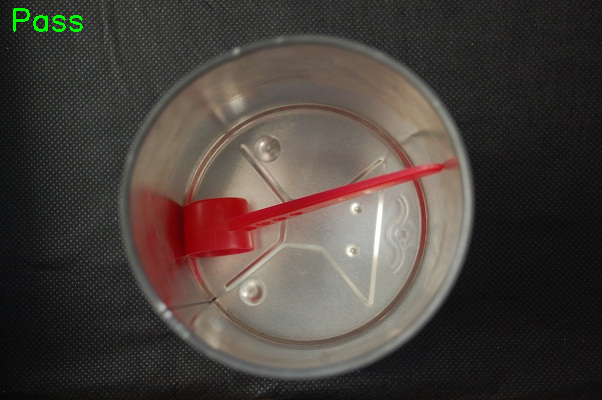

Image: BabyFood-Test1.JPG, Estimated Number of Spoons: 1, Label: Pass


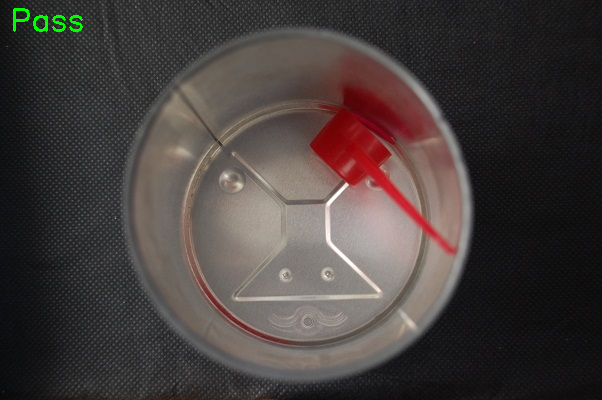

Image: BabyFood-Test21.JPG, Estimated Number of Spoons: 2, Label: Fail


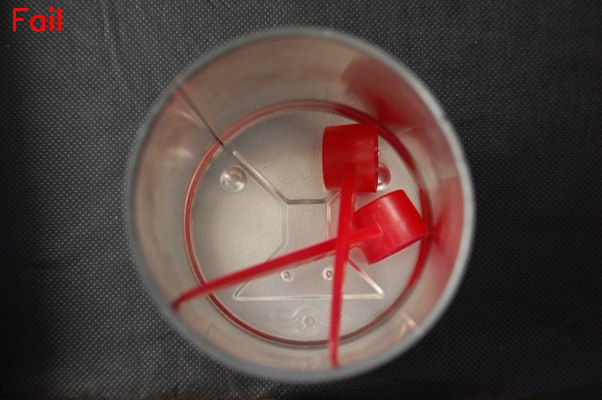

Image: BabyFood-Test20.JPG, Estimated Number of Spoons: 1, Label: Pass


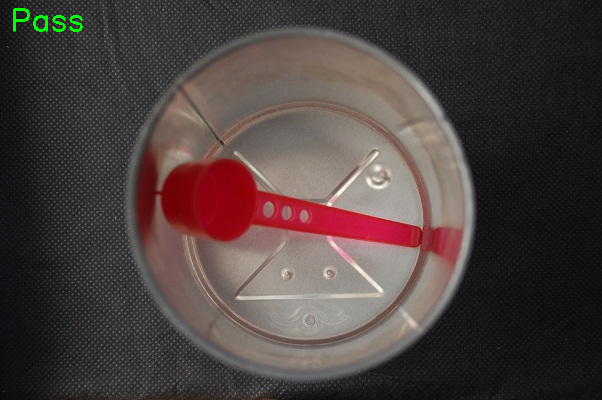

Image: BabyFood-Test9.JPG, Estimated Number of Spoons: 0, Label: Fail


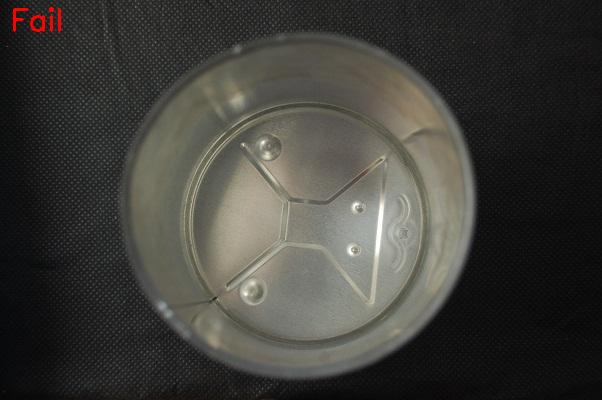

Image: BabyFood-Test7.JPG, Estimated Number of Spoons: 0, Label: Fail


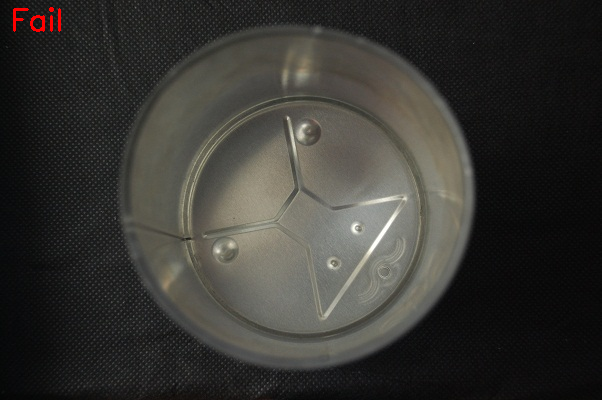

Image: BabyFood-Test15.JPG, Estimated Number of Spoons: 1, Label: Pass


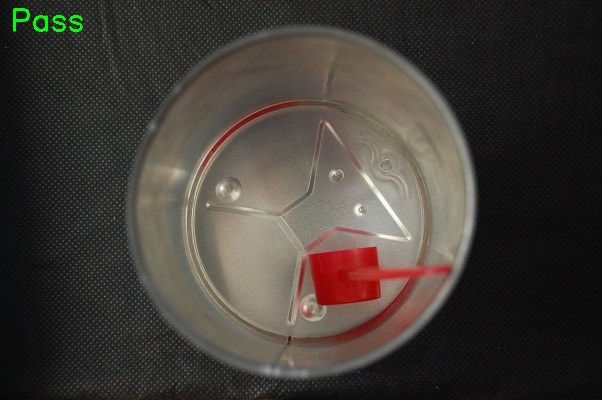

Image: BabyFood-Test19.JPG, Estimated Number of Spoons: 0, Label: Fail


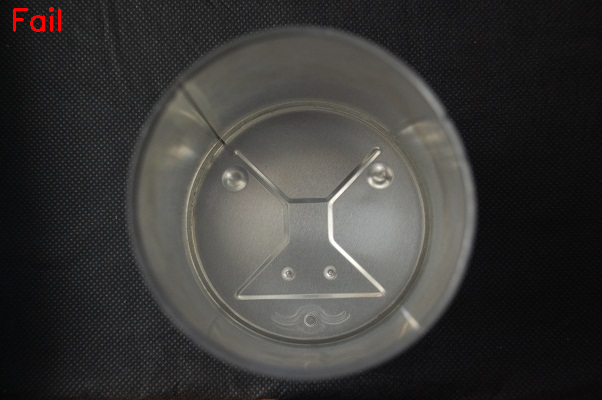

Image: BabyFood-Test11.JPG, Estimated Number of Spoons: 2, Label: Fail


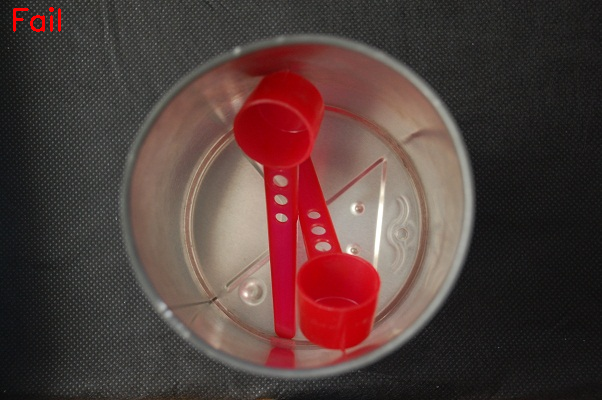

In [8]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Directory path
IMAGE_DIR = '/content/drive/MyDrive/babyfood'

# Define the lower and upper boundaries for the "red" in the HSV color space
RED_LOWER = np.array([0, 70, 50])
RED_UPPER = np.array([10, 255, 255])

# Average number of red pixels for one spoon. You need to determine this value based on your images.
# It's the average count of red pixels that a single spoon would cover in the image
AVERAGE_SPOON_PIXELS = 18000

def preprocess_image(image):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for the red color
    mask = cv2.inRange(hsv, RED_LOWER, RED_UPPER)

    return mask

def count_red_pixels(image):
    # Preprocess the image
    mask = preprocess_image(image)

    # Count the number of red pixels
    n_red_pixels = cv2.countNonZero(mask)

    return n_red_pixels

def estimate_spoons(n_red_pixels):
    # Estimate the number of spoons based on the number of red pixels and the average number of pixels per spoon
    n_spoons = round(n_red_pixels / AVERAGE_SPOON_PIXELS)

    return n_spoons

def main():
    for image_name in os.listdir(IMAGE_DIR):
        image = cv2.imread(os.path.join(IMAGE_DIR, image_name))

        n_red_pixels = count_red_pixels(image)

        n_spoons = estimate_spoons(n_red_pixels)

        if n_spoons == 1:
            label = "Pass"
            color = (0, 255, 0)  # Green color in BGR
        else:
            label = "Fail"
            color = (0, 0, 255)  # Red color in BGR

        # Position for the text (top-left corner)
        position = (10, 30)

        # Draw the text on the image
        cv2.putText(image, label, position, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        print(f'Image: {image_name}, Estimated Number of Spoons: {n_spoons}, Label: {label}')

        cv2_imshow(image)



if __name__ == "__main__":
    main()
